# Data Management - Exisiting Values

**Learning Objective:** 
- Learn to recode variables
- Learn to create new variables
- Learn to use dictionaries


In [1]:
# Load Pandas
import pandas as pd

# Import Data
data_url = "https://raw.githubusercontent.com/datamisc/ts-2020/main/data.csv"
anes_data  = pd.read_csv(data_url, compression='gzip')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
# Subsetting & Renaming Variables
my_vars = [
    "V201033",  # vote_int
    "V201200",  # liberal-conservative self-placement
    "V201151",	 # biden thrm
    "V201152",  # trump thrm
    "V201144x",  # covid 
]

df = anes_data[my_vars]

df.columns = ["vote_int", "ideology", "biden_thrm", "trump_thrm", "covid"]
df.head()


,vote_int,age,ideology,biden_thrm,trump_thrm,covid
0,2,46,6,0,100,1
1,3,37,4,0,0,3
2,1,40,2,65,0,4
3,1,41,3,70,15,4
4,2,72,5,15,85,3


## Recoding Variables Using a Mask/Filter

We can use relational operators (<>=) to identify the observations that meet certain criteria that we want to change.

For instance we could recode the voting intention variable:




In [25]:
# Recoding values with a mask
new_df = df[(df['vote_int']>0) & (df['vote_int']<=5)].copy()  # Creating a new dataframe

# The recoding starts here
mask = new_df['vote_int'] == 1
new_df.loc[mask, "vote_int"] = "J.Biden"
mask = new_df['vote_int'] == 2
new_df.loc[mask, "vote_int"] = "D.Trump"


In [26]:
new_df['vote_int'].value_counts()


J.Biden    3759
D.Trump    3016
3           133
5            86
4            55
Name: vote_int, dtype: int64

### Hack-Time



In [27]:
# Finish recoding the `vote_int` variable


## Recoding Variables Using a Dictionary

One can also recode variables using a dictionnary!

Dictionaries are used to store data values in key:value pairs. Dictionaries are created by using *curly braces* `{}`. The dictionary syntax is a follows: `{"key": "value"}`. 

Here is a example:

    this_is_a_dict = {
        "party": "Democratic",
        "candidate": "J.Biden",
        "year": 2020
    }

Let's recode the `covid` variable this time using the `.replace()` method and dictionary!

- [V201144x](https://sda.berkeley.edu/sdaweb/docs/nes2020/DOC/hcbk0005.htm#V201144x)

In [31]:
my_values = {
    1: "Approve strongly",
    2: "Approve not strongly",
    3: "Disapprove not strongly",
    4: "Disapprove strongly",
    -2: "Don't Know",
}

my_values

{-2: "Don't Know",
 1: 'Approve strongly',
 2: 'Approve not strongly',
 3: 'Disapprove not strongly',
 4: 'Disapprove strongly'}

In [32]:
new_df['covid'].replace(my_values)

0              Approve strongly
1       Disapprove not strongly
2           Disapprove strongly
3           Disapprove strongly
4       Disapprove not strongly
                 ...           
8274           Approve strongly
8275           Approve strongly
8276       Approve not strongly
8277        Disapprove strongly
8279        Disapprove strongly
Name: covid, Length: 7049, dtype: object

In [36]:
new_df['covid'] = new_df['covid'].replace(my_values)
new_df['covid'].value_counts(normalize=True)

Disapprove strongly        0.553696
Approve strongly           0.267839
Approve not strongly       0.120017
Disapprove not strongly    0.056888
Don't Know                 0.001561
Name: covid, dtype: float64

## Filtering or Recoding?

Until now, we have been filtering out observations that we don't need without thinking about the consequences they can have on our results. 

If you apply multiple filters, you add bias to your dataset but you might also end up loosing a big part of your data! 
- **With less data we have less evidence to draw conclusions!**

Let's try to predict the election outcome using pre-election data!

In [46]:
# Filtering Out ALL Observations that are note Biden or Trump
mask = df['vote_int'].between(1,2)
filter_df = df[mask].copy()

# Change Labels
vote_int_labels = {
    1: "J.Biden",
    2: "D.Trump",
}

filtered_output = filter_df['vote_int'].replace(vote_int_labels).value_counts(normalize=True)
filtered_output

J.Biden    0.554834
D.Trump    0.445166
Name: vote_int, dtype: float64

In [47]:
# Recoding Observations
mask = df["vote_int"] > 0
recoded_df = df[mask].copy()

# Keeping all other vote choice intentions coded as "Other"
mask = recoded_df["vote_int"] > 2
recoded_df.loc[mask, "vote_int"] = "Other"

# Recoding the remaining labels using the previously created dictionary
recoded_df["vote_int"] = recoded_df["vote_int"].replace(vote_int_labels)

recoded_output = recoded_df["vote_int"].value_counts(normalize=True)
recoded_output


J.Biden    0.526618
D.Trump    0.422527
Other      0.050855
Name: vote_int, dtype: float64

In [55]:
print("The Filtered Output")
print(filtered_output)
print("==============================")
print("The Recoded Output")
print(recoded_output)

The Filtered Output
J.Biden    0.554834
D.Trump    0.445166
Name: vote_int, dtype: float64
The Recoded Output
J.Biden    0.526618
D.Trump    0.422527
Other      0.050855
Name: vote_int, dtype: float64


# Creating New Variables

When you recode variables you usually want to add a new variable to keep the raw version of your variable, instead of replacing the previous variable.

![](https://pandas.pydata.org/docs/_images/05_newcolumn_1.svg)

Let's try to add an categorical age variable to our dataset. 



In [70]:
recoded_df

,vote_int,age,ideology,biden_thrm,trump_thrm,covid
0,D.Trump,46,6,0,100,1
1,Other,37,4,0,0,3
2,J.Biden,40,2,65,0,4
3,J.Biden,41,3,70,15,4
4,D.Trump,72,5,15,85,3
...,...,...,...,...,...,...
8274,D.Trump,54,6,0,85,1
8275,D.Trump,26,99,0,100,1
8276,D.Trump,52,6,50,70,2
8277,J.Biden,45,4,70,30,4


In [71]:
recoded_df["age_cat"] = pd.cut(
    df["age"], 
    bins=[17,35,50,65,80], 
    labels=["18-35", "36-50", "51-65", "66+"]
)

recoded_df


,vote_int,age,ideology,biden_thrm,trump_thrm,covid,age_cat
0,D.Trump,46,6,0,100,1,36-50
1,Other,37,4,0,0,3,36-50
2,J.Biden,40,2,65,0,4,36-50
3,J.Biden,41,3,70,15,4,36-50
4,D.Trump,72,5,15,85,3,66+
...,...,...,...,...,...,...,...
8274,D.Trump,54,6,0,85,1,51-65
8275,D.Trump,26,99,0,100,1,18-35
8276,D.Trump,52,6,50,70,2,51-65
8277,J.Biden,45,4,70,30,4,36-50


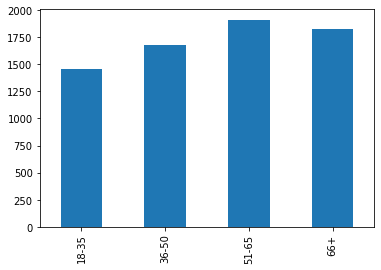

In [74]:
recoded_df['age_cat'].value_counts().sort_index().plot(kind='bar')


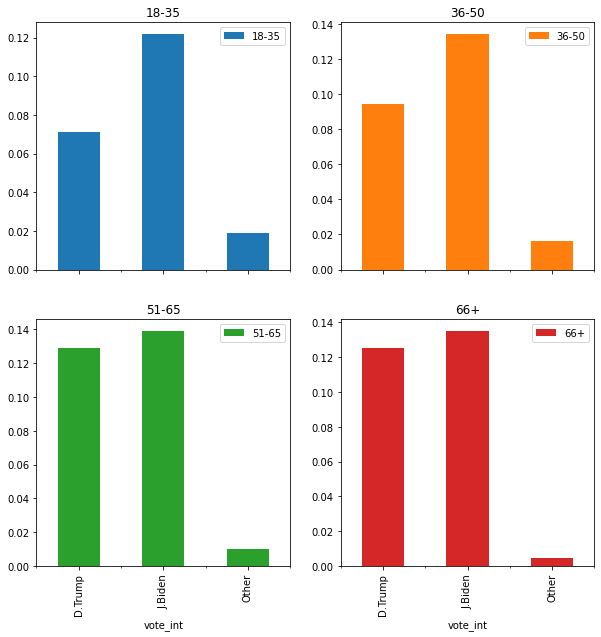

In [92]:
pd.crosstab(recoded_df['vote_int'], recoded_df['age_cat'], normalize=True).plot(kind='bar', subplots=True, figsize=(10,10), layout=(2,2));

### Hack-Time

In [ ]:
# Add a `clean_covid` variable to recoded_df

# Let's plot

# Let's use feelings thermometers to measure polarization



![](https://pandas.pydata.org/docs/_images/05_newcolumn_2.svg)